## Projet de développement informatique
Nathan Bouret

In [1]:
import plotly.express as px
from jupyter_dash import JupyterDash
from dash import dcc, html
from dash.dependencies import Input, Output
from dash import callback_context
from dash import dash_table as dt
import numpy as np
import pandas as pd
from crochet import setup
setup()

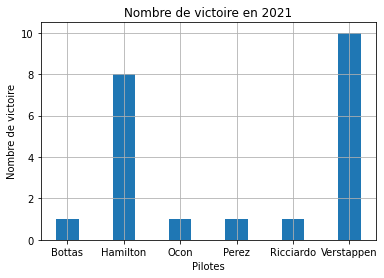

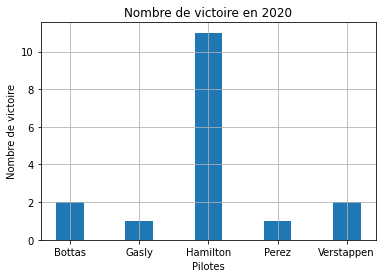

<ipython-input-2-d04e7dad361c>:43: pandas.core.common.SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<ipython-input-2-d04e7dad361c>:45: pandas.core.common.SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<ipython-input-2-d04e7dad361c>:101: pandas.core.common.SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<ipython-input-2-d04e7dad361c>:103: pandas.core.common.SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFram

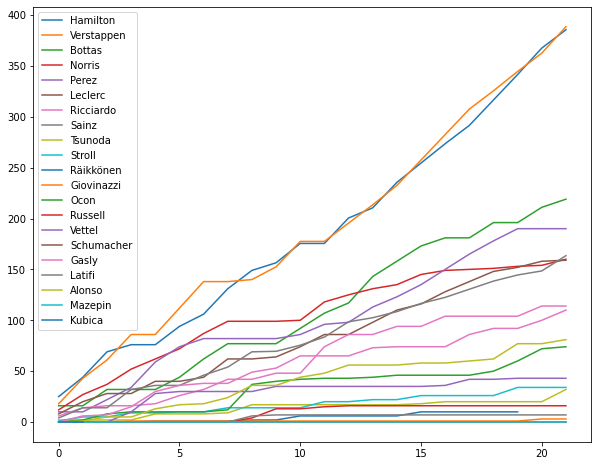

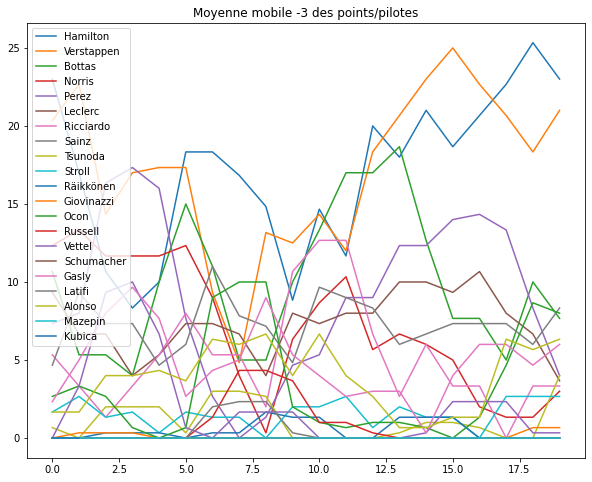

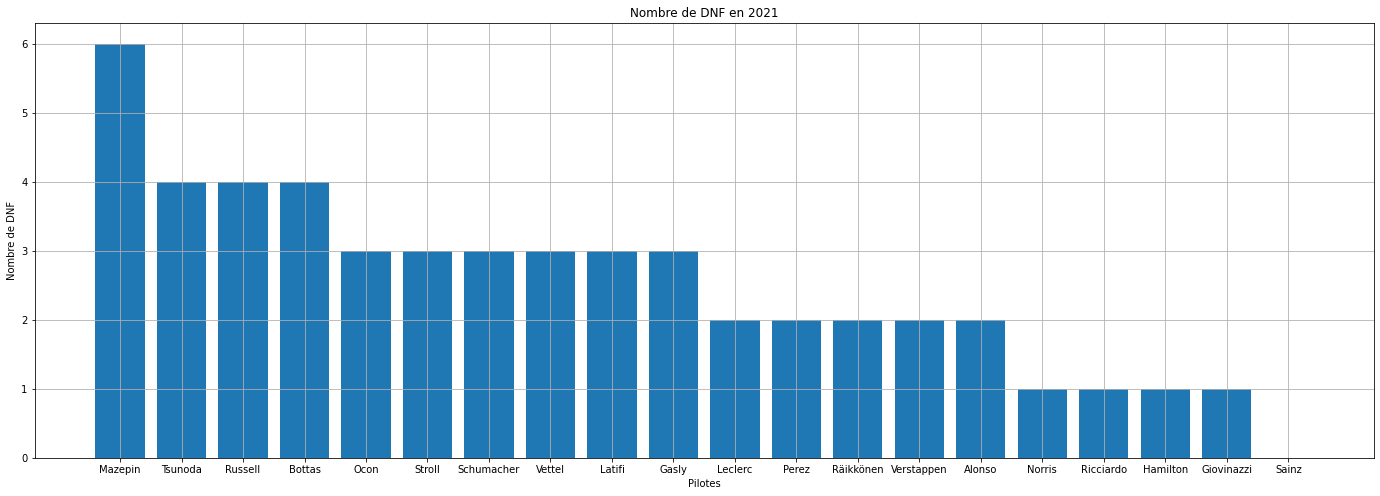

In [2]:
winners = pd.read_json("/Users/nbouret/Documents/DataspellProjects/DataspellProjects/f1Results/results2021.json")
winners
winners.Place.values[0]
winners["Place"] = winners["Place"].str.extract(r"([^(\\\n)]*)")
winners
winners.count()
winners.groupby('driver').count()
driverCount = winners.loc[winners.Year == 2021].groupby('driver').count()
winnersTable = pd.crosstab(winners['driver'],
                           winners['Place'],
                           margins=False)
winnersTable
import matplotlib.pyplot as plt

plt.bar(driverCount.index.values, driverCount['laps'].values, width=0.4)
plt.title("Nombre de victoire en 2021")
plt.xlabel("Pilotes")
plt.ylabel("Nombre de victoire")
plt.grid()
plt.show()
driverCount20 = winners.loc[winners.Year == 2020].groupby('driver').count()
plt.bar(driverCount20.index.values, driverCount20['laps'].values, width=0.4)
plt.title("Nombre de victoire en 2020")
plt.xlabel("Pilotes")
plt.ylabel("Nombre de victoire")
plt.grid()
plt.show()
races2021 = pd.read_json("/Users/nbouret/Documents/DataspellProjects/DataspellProjects/f1Results/races2021.json")
import re

name = []
for i in range(len(races2021)):
    name.append(re.findall(r"(FORMULA.*?2021)", races2021.place.values[i][0]))
races2021.place = name[:]
races2021
races = pd.read_json("/Users/nbouret/Documents/DataspellProjects/DataspellProjects/f1Results/races2021-2.json")
name2 = []
for i in range(len(races)):
    name2.append(re.findall(r"(FORMULA.*?2021)", races.circuit.values[i][0]))

for i in range(len(races.position)):
    if races.position[i] == "NC":
        races.position[i] = 30
    if races.position[i] == "DQ":
        races.position[i] = 40
races.circuit = name2[:]

races.position = races["position"].astype('int32')
Circuit = []
for i in range(len(races.circuit)):
    Circuit.append(races.circuit.iloc[i][0])
races.circuit = Circuit[:]
races = races.sort_values(['Race Rank', 'position'], ascending=[True, True])
races
bahrain = races.loc[races['circuit'] == 'FORMULA 1 GULF AIR BAHRAIN GRAND PRIX 2021']
races.sort_values(["driver", 'Race Rank'])
cum_results = races.drop(['driver', 'time', 'team_name', 'Place', 'circuit'], axis=1).cumsum(axis=1)
type(races.position[0])
cum_results
racesList = races.circuit.unique().tolist()
driverList = races.driver.unique().tolist()
plt.figure(figsize=(10, 8))
for pilote in driverList:
    plt.plot(np.cumsum(races.loc[(races.driver == pilote), 'points'].values.tolist()), label=pilote)
plt.legend()


def MA(x, w):
    return np.convolve(x, np.ones(w), 'valid') / w


plt.figure(figsize=(10, 8))
for pilote in driverList:
    plt.plot(MA(races.loc[(races.driver == pilote), 'points'], 3), label=pilote)
plt.title("Moyenne mobile -3 des points/pilotes")
plt.legend()
races[(races.position != 30) & (races.position != 40)].groupby('driver').mean().drop(
    columns=['Year', 'Race Rank']).sort_values("position")

races[(races.position != 30) & (races.position != 40)].groupby('driver').mean().drop(
    columns=['Year', 'Race Rank']).sort_values("points", ascending=False)
#on enleve les 30 et 40 (dsq and DNF)
races.groupby('driver').sum().drop(columns=["Race Rank", "position", "No", "Year", "laps"]).sort_values("points",
                                                                                                        ascending=False)
tabDNF = races[(races.position == 30) | (races.position == 40)].value_counts("driver").append(pd.Series({"Sainz": 0}))

plt.figure(figsize=(24, 8))
plt.bar(tabDNF.index, height=tabDNF)
plt.title('Nombre de DNF en 2021')
plt.ylabel('Nombre de DNF')
plt.xlabel('Pilotes')
plt.grid()
racesGen = pd.read_json('/Users/nbouret/Documents/DataspellProjects/DataspellProjects/f1Results/racesGen.json')
nameGen = []
for i in range(len(racesGen)):
    nameGen.append(re.findall(r"(?=FORMULA|\d)(.*)(?<=PRIX|\d{4})", racesGen.circuit.values[i][0]))

racesGen.circuit = nameGen[:]
for i in range(len(racesGen.position)):
    if racesGen.position[i] == "NC":
        racesGen.position[i] = 30
    if racesGen.position[i] == "DQ":
        racesGen.position[i] = 40
racesGen.position = racesGen["position"].astype('int32')
CircuitGen = []
for i in range(len(racesGen.circuit)):
    CircuitGen.append(racesGen.circuit.iloc[i][0])
racesGen.circuit = CircuitGen[:]
racesGen = racesGen.sort_values(['Race Rank', 'position'], ascending=[True, True])

teamRanks = pd.read_json("/Users/nbouret/Documents/DataspellProjects/DataspellProjects/f1Results/teamsRank.json")
teamRanks.position = pd.to_numeric(teamRanks['position'], errors = 'coerce',downcast='signed')
###WEATHER INFO
weather  = pd.read_json('/Users/nbouret/Documents/DataspellProjects/DataspellProjects/f1Results/f1Results/raceWeather.json')

In [3]:
nameGen2 = []
for i in range(len(racesGen)):
    nameGen2.append(re.findall(r"(?<=FORMULA 1)(.*)",racesGen.circuit.values[i])[0])
racesGen['circuitShort'] = nameGen2[:]

In [4]:
### Pour dictionnaire
def valeurs(row):
    dictList = []
    for i in row:
        dictList.append({'label': i, 'value': i})

    return dictList
###
### css
colors = {
    'background': '#FCF9E6',
    'text': '#D3190D'
}
###
# Build App
app = JupyterDash(__name__)
app.layout = html.Div(style={'backgroundColor': colors['background']},children=[
    html.H1(children = "F1 dashboard", style = {'text-align' : 'center', 'color': colors['text'], 'font-family': "Arial", 'font-size': '60px'}),
    dcc.Tabs([
        dcc.Tab(label='Représentation visuelle',style={'backgroundColor': colors['background'], "font-family": "Arial"} ,children=[
            html.H2(
                children='Dashboard',
                style={
                    'textAlign': 'center',
                    'color': colors['text'],
                    'font-family': "Arial"
                }
            ),
    html.Label(style = {'font-size': '20px', 'font-family': 'Arial'},children=[
        "Drivers",
        dcc.Dropdown(
            style ={'backgroundColor': colors['background'], 'font-family': "Arial"},
            id='driver-dropdown',
            clearable=True,
            multi = True,
            value=[racesGen.driver[0]], options=[
                                                    {'label': c, 'value': c}
                                                    for c in racesGen.driver.unique()
                                                ]+[{'label': 'Select all', 'value': 'allValues'}]),
    ]),
    html.Label(style = {'font-size': '20px', 'font-family': ' Arial'}, children = [
        "Years",
        dcc.Dropdown(
            id='year2-dropdown',
            style ={'backgroundColor': colors['background'], 'font-family': "Arial"},
            clearable=True,
            multi = True,
            value=[racesGen.Year[0]], options=[
                                                  {'label': c, 'value': c}
                                                  for c in racesGen.Year.unique()
                                              ]+[{'label': 'Select all', 'value': 'allValues'}])
    ]),
    html.Button("Nom de course",id="button1", style ={'backgroundColor': colors['background'], 'font-family':'Arial', 'padding': '15px 32px', 'font-size': '30px', 'width': '50%', 'border-radius': '5px'}, n_clicks=0),
    html.Button("ID de course",id="button2", style ={'backgroundColor': colors['background'], 'font-family': 'Arial', 'padding': '15px 32px','font-size': '30px', 'width': '50%', 'margin-top' :'5px', 'border-radius': '15px'}, n_clicks=0),
    dcc.Graph(id='graph1', style={'width': '180vh', 'height': '90vh', 'border-radius': '5px', 'margin-top' :'15px'}),
    html.P(children = ["Le Race Rank correspond au numéro d'ID de la course. Il est unique."], style = {'font-family': 'Arial', 'text-align' : 'center'}),
    dcc.Graph(id='graph4', style= {'width': '160vh', 'height': '80vh'}),
    dcc.Graph(id='graph2'),
    html.Label(style= {'font-size': '20px', 'font-family': 'Arial'}, children = [
        "Years",
        dcc.Dropdown(
            style ={'backgroundColor': colors['background'], 'font-family': "Arial"},
            id='year-dropdown',
            clearable=True,
            multi = True,
            value=[teamRanks.year[0]], options=[
                                         {'label': c, 'value': c}
                                         for c in teamRanks.year.unique()
                                     ]+[{'label': 'Select all', 'value': 'allValues'}])
        ]),
            dcc.Graph(id='graph3'),
            html.Label(style = {'font-size': '20px', 'font-family': ' Arial'}, children = [
                "Years",
                dcc.Dropdown(
                    id='yearWeather-dropdown',
                    style ={'backgroundColor': colors['background'], 'font-family': "Arial"},
                    clearable=True,
                    multi = True,
                    value=[weather.year[0]], options=[
                                                          {'label': c, 'value': c}
                                                          for c in weather.year.unique()
                                                      ]+[{'label': 'Select all', 'value': 'allValues'}])
            ]),
            dcc.Graph(id="pieWeather"),

        ]),
        dcc.Tab(label='Tableau de données', style ={'backgroundColor': colors['background'], "font-family":"Arial"},children=[
            html.H2(
                children='Tableau de données selectionnées',
                style={
                    'textAlign': 'center',
                    'color': colors['text'],
                    'font-family': "Arial"
                }
            ),
            dt.DataTable(
                id='f1Table',
                export_format="csv"
            )
        ]),
    ]),
    html.Footer("Dashboard created by Nathan Bouret", style = {'text-align': 'center'})
])

In [5]:
@app.callback(
    Output('graph1', 'figure'),
    [Input("driver-dropdown", "value"),
     Input('year2-dropdown', 'value'),
     Input('button1', "n_clicks"),
     Input('button2', "n_clicks")]
)
def update_figure1(driver, year2, btn1, btn2):
    changed_id = [p['prop_id'] for p in callback_context.triggered][0]
    if driver == ["allValues"]:
        mask = racesGen.loc[(racesGen.driver.isin(racesGen.driver))& (racesGen.Year.isin(year2))]

    else:
        mask = racesGen.loc[(racesGen.driver.isin(driver))& (racesGen.Year.isin(year2))]
    if 'button1' in changed_id:
        xaxis = "circuitShort"
    else:
        xaxis = "Race Rank"
    fig = px.line(mask, x=xaxis, y="points", color = "driver", title = "Nombre de points par courses", markers = True).update_layout({"plot_bgcolor": "rgba(0, 0, 0, 0)", "paper_bgcolor": "rgba(0, 0, 0, 0)"})
    return fig

@app.callback(
    Output('graph2', 'figure'),
    [Input("year-dropdown", "value")]
)
def update_figure2(years):
    if years == ["allValues"]:
        mask = teamRanks.year.isin(teamRanks.year)
    else:
        mask = teamRanks.year.isin(years)
    fig =px.pie(teamRanks[mask], values='points', names='team_name', title = "Répartition des points des écuries").update_layout({"plot_bgcolor": "rgba(0, 0, 0, 0)", "paper_bgcolor": "rgba(0, 0, 0, 0)"})
    return fig
@app.callback(
    Output('graph3', 'figure'),
    [Input("year-dropdown", "value")]
)
def update_figure3(years):
    if years == ["allValues"]:
        mask =racesGen.loc[(racesGen.position == 1) & (racesGen.Year.isin(racesGen.Year))]
    else:
        mask = racesGen.loc[(racesGen.position == 1) & (racesGen.Year.isin(years))]
    fig = px.bar(x = mask.driver.unique().tolist(), y = mask.groupby('driver').count().position.tolist(), title = "Nombre de victoire par année").update_layout({"plot_bgcolor": "rgba(0, 0, 0, 0)", "paper_bgcolor": "rgba(0, 0, 0, 0)"})
    return fig
@app.callback(
    Output('graph4', 'figure'),
    [Input("driver-dropdown", "value"),
     Input('year2-dropdown', 'value'),
     Input('button1', "n_clicks"),
     Input('button2', "n_clicks")]
)
def update_figure4(driver, year2, btn1, btn2):
    changed_id = [p['prop_id'] for p in callback_context.triggered][0]
    if driver == ["allValues"]:
        mask = racesGen.loc[(racesGen.driver.isin(racesGen.driver))& (racesGen.Year.isin(year2))]

    else:
        mask = racesGen.loc[(racesGen.driver.isin(driver))& (racesGen.Year.isin(year2))]
    if 'button1' in changed_id:
        xaxis = "circuitShort"
    else:
        xaxis = "Race Rank"
    mask['points2'] = mask.groupby('driver').cumsum().points
    fig = px.line(mask, x=xaxis, y="points2", color = "driver", title = "Nombre de points cumulés", markers = True).update_layout({"plot_bgcolor": "rgba(0, 0, 0, 0)", "paper_bgcolor": "rgba(0, 0, 0, 0)"})
    return fig
@app.callback(
    Output('pieWeather', 'figure'),
    [Input("yearWeather-dropdown", "value")]
)
def update_pieweather(years):
    if years == ["allValues"]:
        mask =weather.loc[(weather.Year.isin(weather.Year)),  ~weather.columns.isin(['Race','year'])]
    else:
        mask = weather.loc[weather.year.isin(years),  ~weather.columns.isin(['Race','year'])]
    df = mask.melt(var_name="weather")
    fig =px.pie(df, values='value', names = 'weather',title = "Type de météo par année").update_layout({"plot_bgcolor": "rgba(0, 0, 0, 0)", "paper_bgcolor": "rgba(0, 0, 0, 0)"})
    return fig

@app.callback([Output(component_id='f1Table', component_property='data'),
               Output(component_id='f1Table', component_property='columns')],
              [Input("driver-dropdown", "value"),
               Input('year2-dropdown', 'value')])
def update_table(driver, year2):
    if driver == ["allValues"]:
        df = racesGen.loc[(racesGen.driver.isin(racesGen.driver))& (racesGen.Year.isin(year2))]

    else:
        df = racesGen.loc[(racesGen.driver.isin(driver))& (racesGen.Year.isin(year2))]
    columns = [{'name': col, 'id': col} for col in df.columns]
    data = df.to_dict(orient='records')
    return data, columns

# Run app and display result inline in the notebook
app.run_server(mode='external')

Dash app running on http://127.0.0.1:8050/
